# <b>Import required Libraries</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
%matplotlib inline

In [2]:
pip install ucimlrepo

# <b>Importing Dataset and Alligning the columns</b>

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
computer_hardware = fetch_ucirepo(id=29)

# data (as pandas dataframes)
X = computer_hardware.data.features
y = computer_hardware.data.targets

# metadata
print(computer_hardware.metadata)

# variable information
print(computer_hardware.variables)


{'uci_id': 29, 'name': 'Computer Hardware', 'repository_url': 'https://archive.ics.uci.edu/dataset/29/computer+hardware', 'data_url': 'https://archive.ics.uci.edu/static/public/29/data.csv', 'abstract': 'Relative CPU Performance Data, described in terms of its cycle time, memory size, etc.', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 209, 'num_features': 10, 'feature_types': ['Integer'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Fri Oct 27 2023', 'dataset_doi': '10.24432/C5830D', 'creators': ['Jacob Feldmesser'], 'intro_paper': None, 'additional_info': {'summary': 'The estimated relative performance values were estimated by the authors using a linear regression method.  See their article (pp 308-313) for more details on how the relative performance values were set.', 'purpose': None, 'funded_by': N

In [4]:
data = pd.read_csv('/content/machine.data', header=None)
data.columns = ["Vendor", "Model", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]

# <b><u>Question-1: Data Visualization and Exploration [1 M]</u></b>

**1. Print 2 rows for a sanity check to identify all the features present in the dataset
and if the target matches with them.**


In [5]:
data.head(2)
#printing first 2 rows of the data using the head function

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253


In [6]:
data.info()
print("\n")
print("The data frame has {} rows and {} columns".format(data.shape[0],data.shape[1]))

#To check the data type of the dataset imported and for checking any anomaly in data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Vendor  209 non-null    object
 1   Model   209 non-null    object
 2   MYCT    209 non-null    int64 
 3   MMIN    209 non-null    int64 
 4   MMAX    209 non-null    int64 
 5   CACH    209 non-null    int64 
 6   CHMIN   209 non-null    int64 
 7   CHMAX   209 non-null    int64 
 8   PRP     209 non-null    int64 
 9   ERP     209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


The data frame has 209 rows and 10 columns


**2. Comment on class imbalance with the appropriate visualization method.**

In [7]:
data.describe()

#The following output shows that the mean is always greate than median which represents data is positively skewed.

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


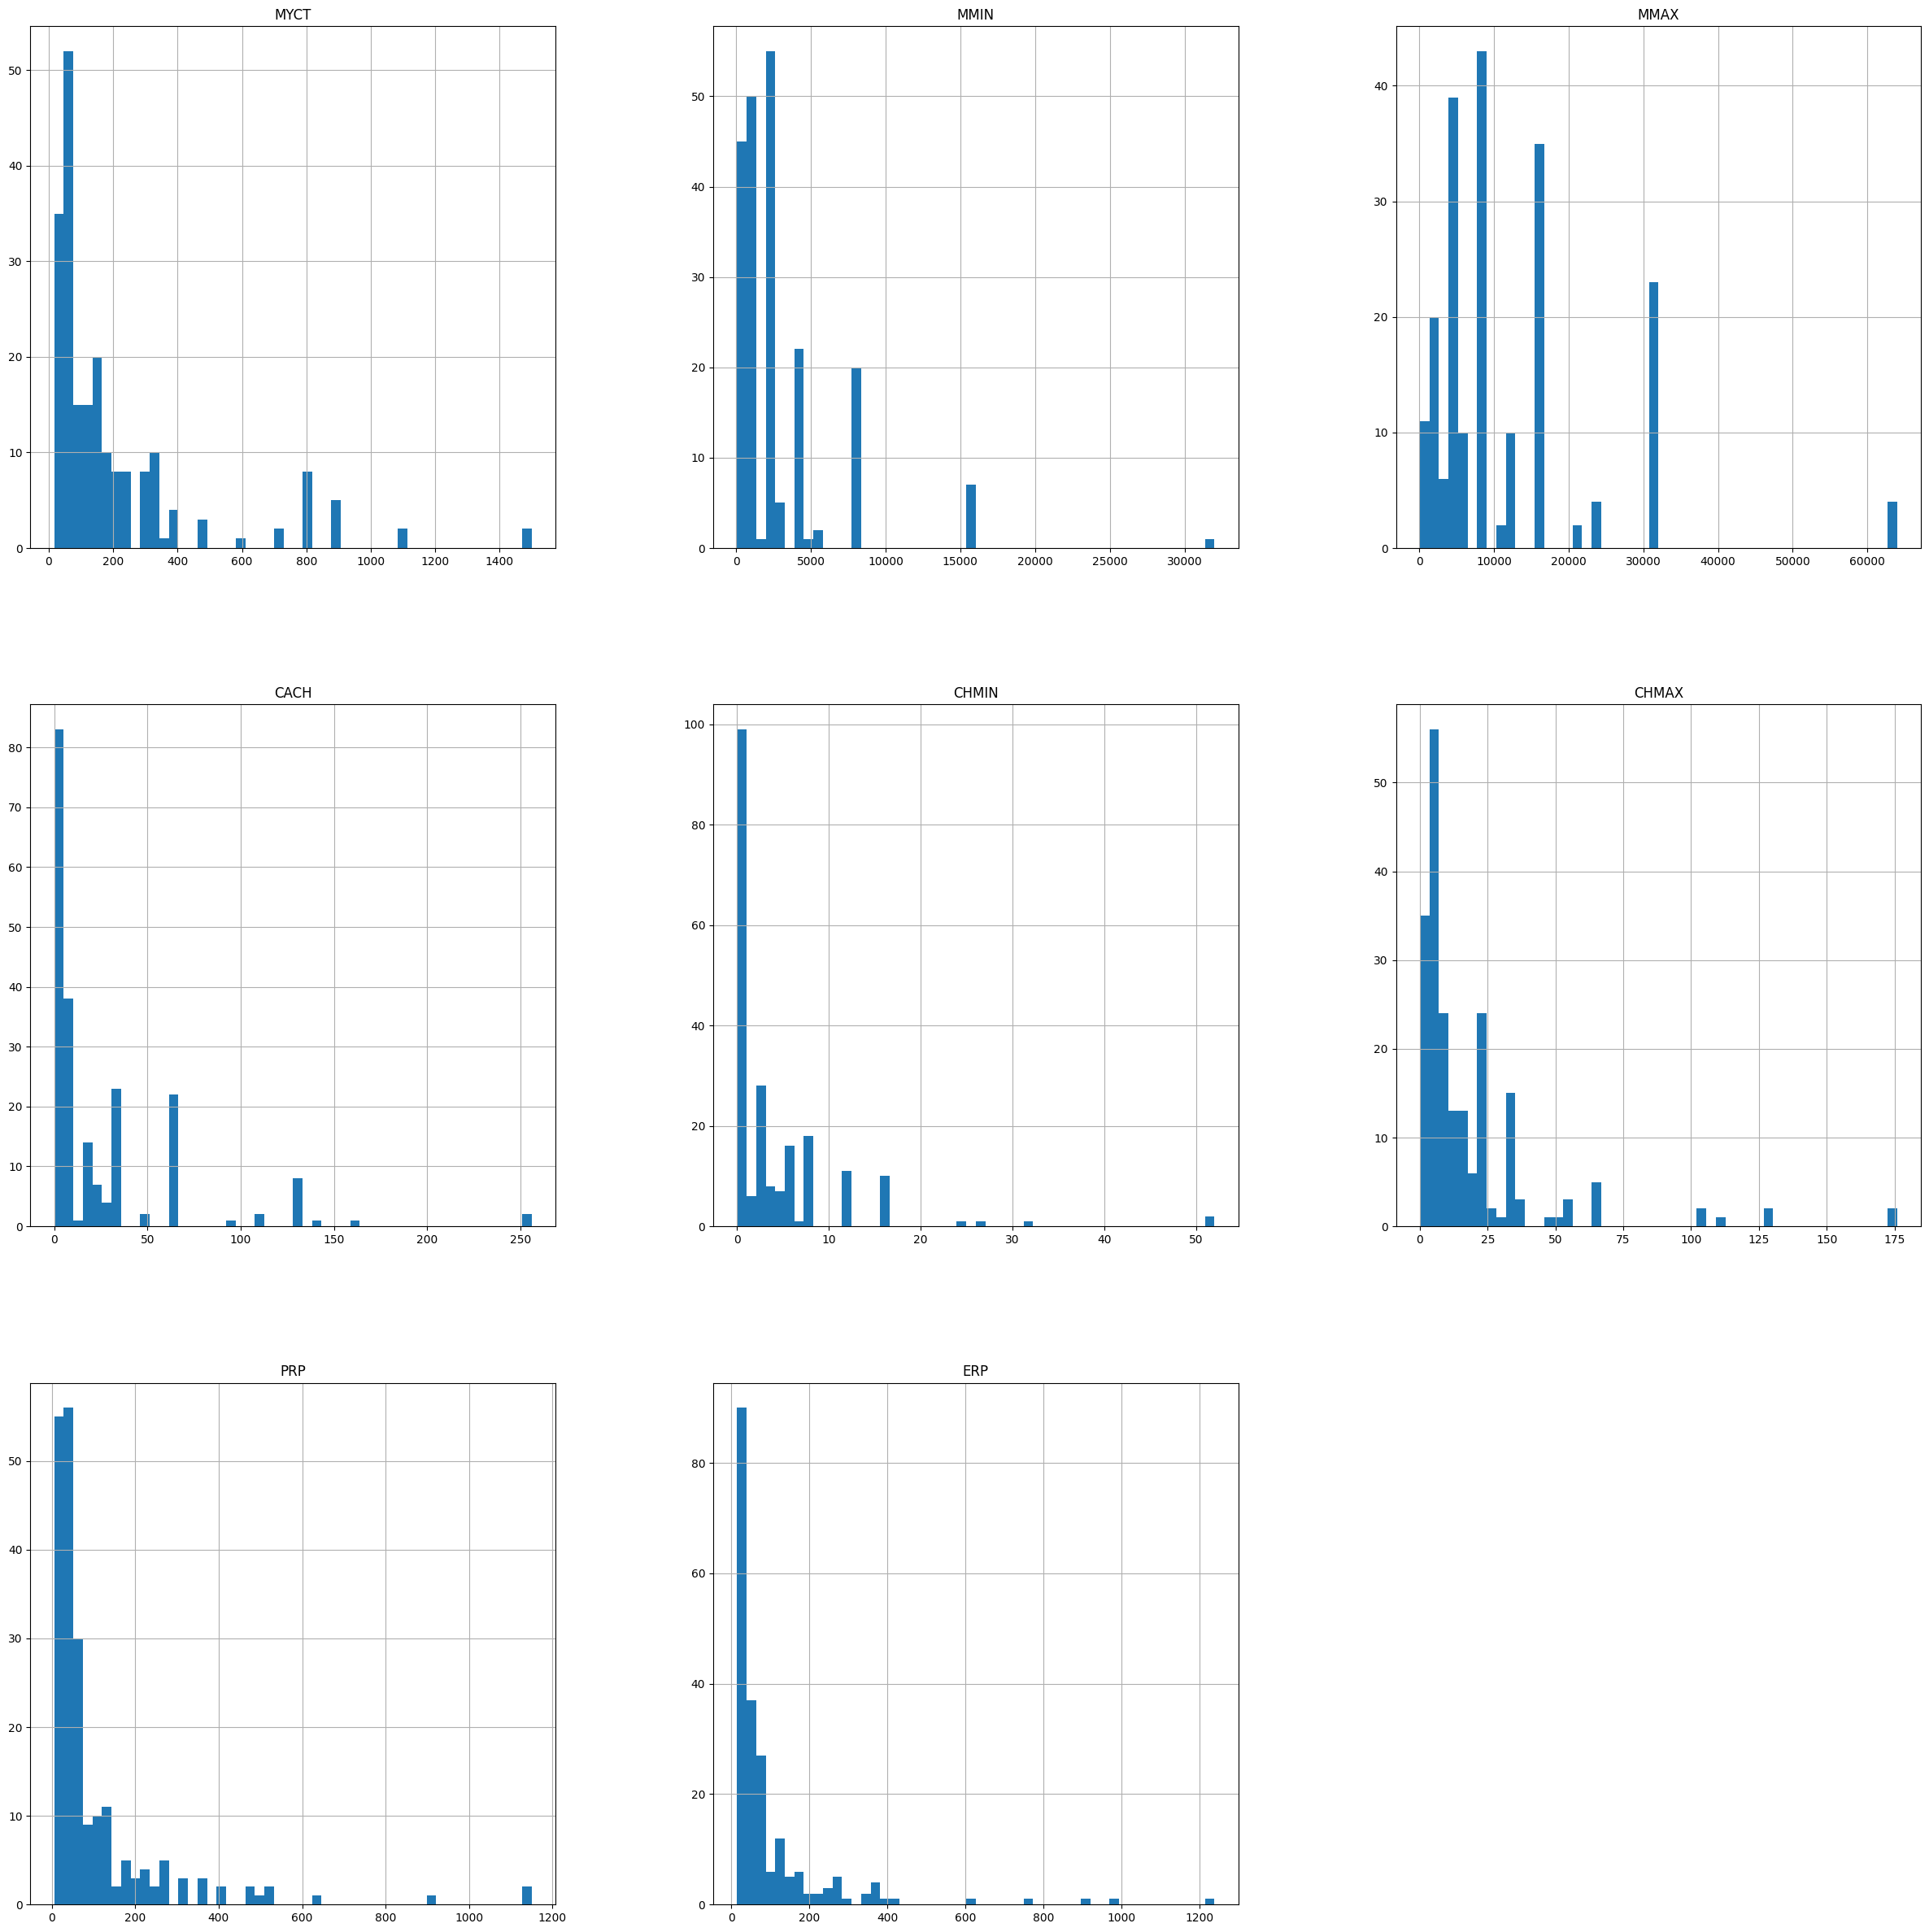

In [11]:
data.hist(bins=50, figsize=(30,30))
plt.show()

#Visualization of the data in histogram below wrt to target variable PRP

**3. Provide appropriate visualizations to get an insight into the dataset**

<ipython-input-8-0b366207179f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.iloc[:,2])


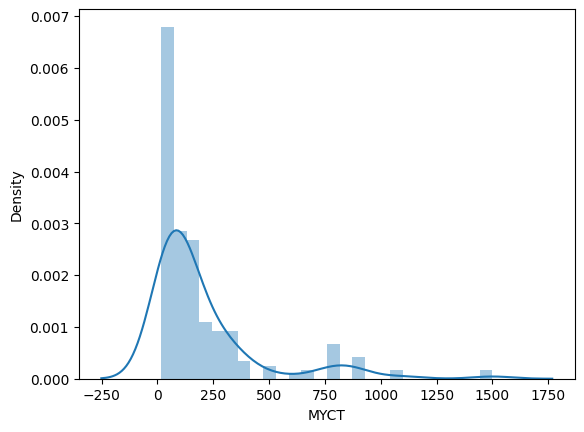

<ipython-input-8-0b366207179f>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.iloc[:,3])


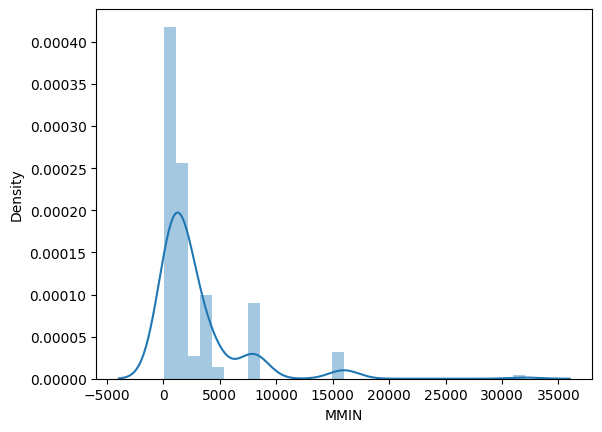

<ipython-input-8-0b366207179f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.iloc[:,4])


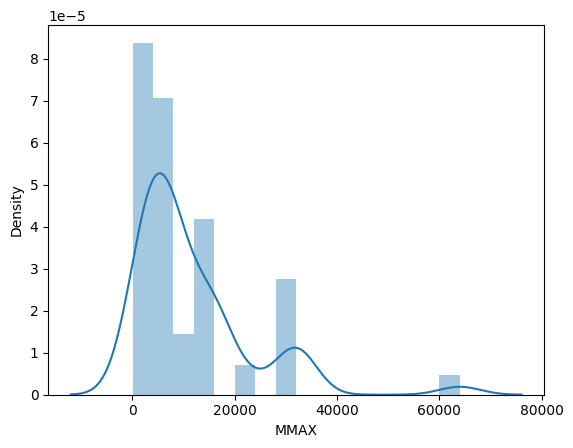

<ipython-input-8-0b366207179f>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.iloc[:,5])


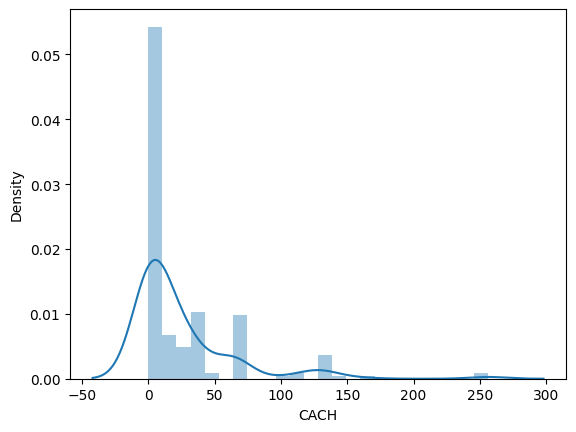

<ipython-input-8-0b366207179f>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.iloc[:,6])


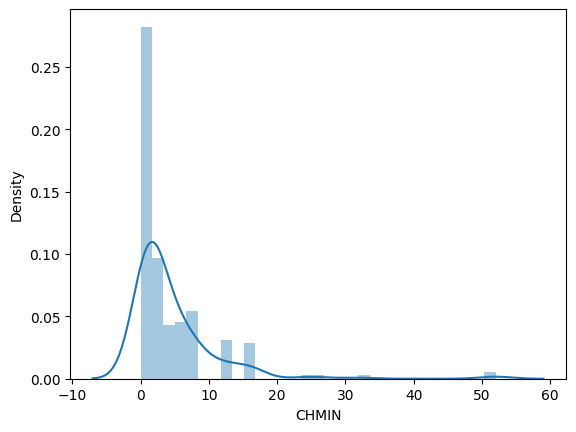

<ipython-input-8-0b366207179f>:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.iloc[:,7])


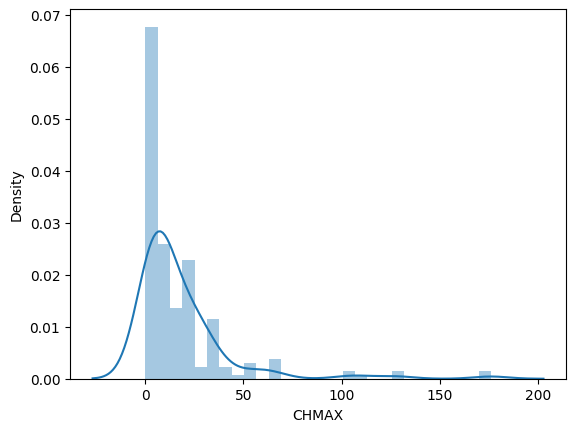

In [8]:
#Using seaborn to visualize the data

#WAY1

#Plot univariate distribution of data: MYCT
sns.distplot(data.iloc[:,2])
plt.show()

#Plot univariate distribution of data: MMIN
sns.distplot(data.iloc[:,3])
plt.show()

#Plot univariate distribution of data: MMAX
sns.distplot(data.iloc[:,4])
plt.show()

#Plot univariate distribution of data: CACH
sns.distplot(data.iloc[:,5])
plt.show()

#Plot univariate distribution of data: CHMIN
sns.distplot(data.iloc[:,6])
plt.show()

#Plot univariate distribution of data: CHMAX
sns.distplot(data.iloc[:,7])
plt.show()

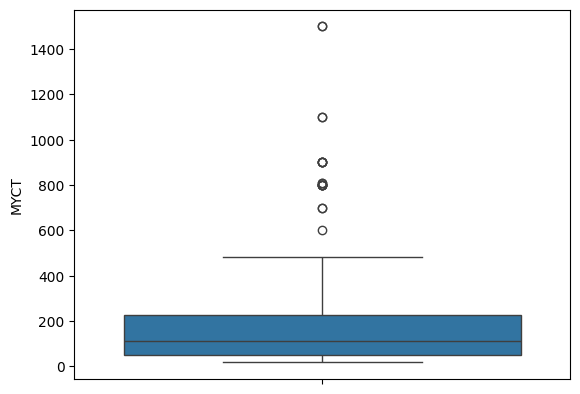

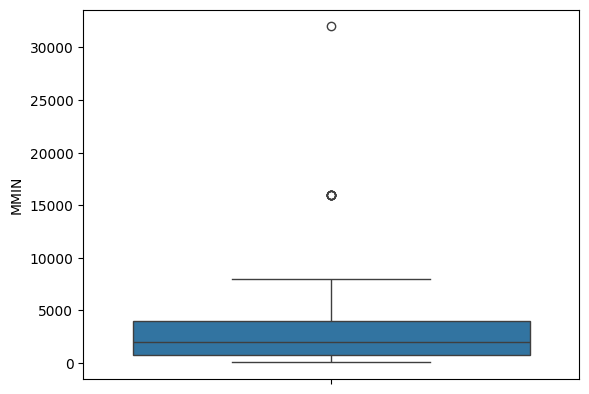

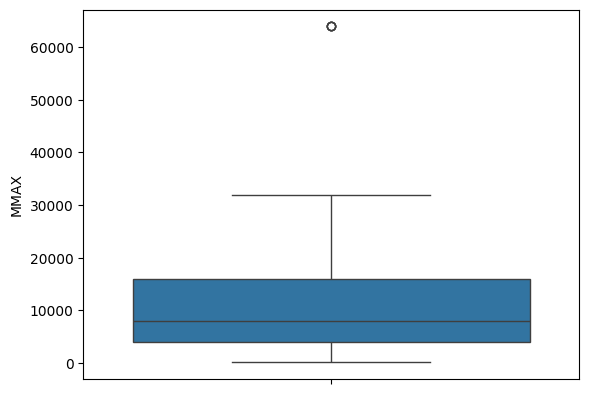

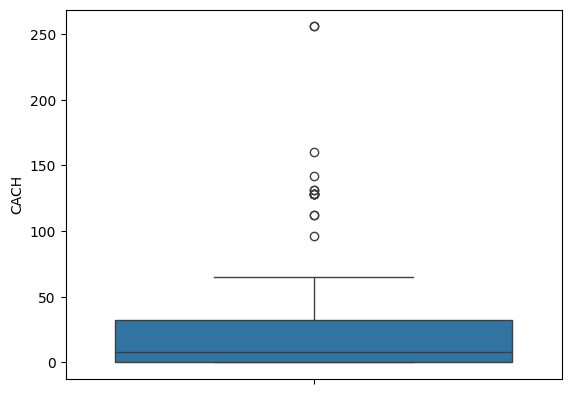

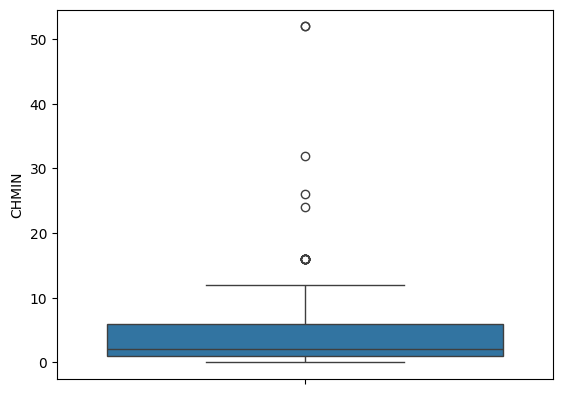

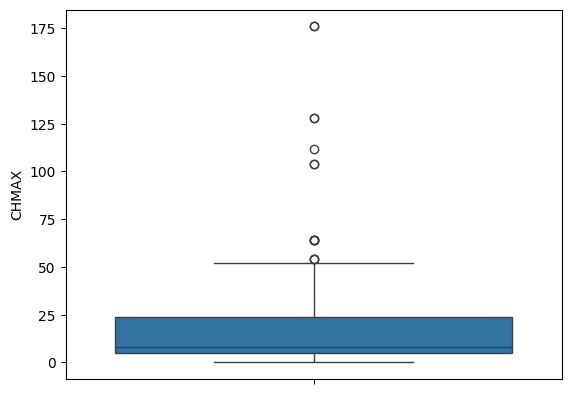

In [9]:
#Using seaborn to visualize the data

#WAY2

#Plot how distributed the data in a data set : MYCT
sns.boxplot(data.iloc[:,2])
plt.show()

#Plot how distributed the data in a data set : MMIN
sns.boxplot(data.iloc[:,3])
plt.show()

#Plot how distributed the data in a data set : MMAX
sns.boxplot(data.iloc[:,4])
plt.show()

#Plot how distributed the data in a data set : CACH
sns.boxplot(data.iloc[:,5])
plt.show()

#Plot how distributed the data in a data set : CHMIN
sns.boxplot(data.iloc[:,6])
plt.show()

#Plot how distributed the data in a data set : CHMAX
sns.boxplot(data.iloc[:,7])
plt.show()

**4. Do the correlational analysis on the dataset. Provide a visualization for the same.
Will this correlational analysis have an effect on the feature selection that you will
perform in the next step? Justify your answer. Answers without justification will
not be awarded marks.**

<Axes: >

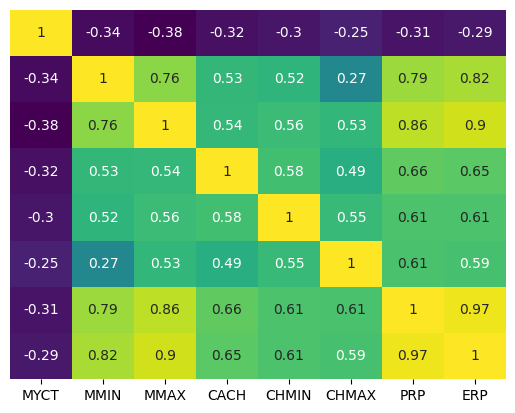

In [14]:
numerical_data = data.select_dtypes(include=['number']) # Select only numerical columns
sns.heatmap(numerical_data.corr(), annot=True, cbar=False, yticklabels=False, cmap='viridis')



```
As we can see PRP is correlated with all features with having exclusion of Vendor Name and Model Name.

Strongest Positive corelation with: MMAX (0.9)
Strongest Negative corelation with: MYCT
```



# <b><u>Question-2. Data Pre-processing and cleaning [2M]</u></b>

**1.Do the appropriate pre-processing of the data like identifying NULL or Missing
Values, if any, handling of outliers if present in the dataset, skewed data etc.
Mention the pre-processing steps performed in the markdown cell. Explore a few
latest data balancing tasks and their effect on model evaluation parameters.**




> 1: Null Value Check



In [15]:
data.apply(lambda x:sum(x.isnull()))

Vendor    0
Model     0
MYCT      0
MMIN      0
MMAX      0
CACH      0
CHMIN     0
CHMAX     0
PRP       0
ERP       0
dtype: int64



> 2. Skewness Check



In [16]:
pd.DataFrame([stats.skew(data['MMIN']),stats.skew(data['MMAX']),stats.skew(data['PRP'])],index=['MMIN','MMAX','PRP'],columns=['skewness'])

,skewness
MMIN,3.490649
MMAX,2.125268
PRP,3.864820




```
As you can see there is no Null value of Missing Values in the Dataset. Hence no need to perform any operations related to this.

As there are no NULL values no need to perform Outliers handling and Skewed data redressal.  
```



**2. Apply appropriate feature engineering techniques for them. Apply the feature
transformation techniques like Standardization, Normalization, etc. You can apply
the appropriate transformations depending on your dataset’s structure and
complexity. Provide proper justification. Techniques used without justification
will not be awarded marks. Explore a few techniques for identifying feature
importance for your feature engineering task.**


> To apply Feature engineering:<br>
a) Feature Subset Selection:</b><br/>
Drop two irrelevent features:
</br>1: Model
><li>Visualizing the data shows data per row is unique and Model attributes are not required. Hence drop Model</li>
2: ERP
><li>Considering PRP as target varaible for this model computation; Carrying "ERP" dataset will be not neccessary and expensive for computiting.  Also in question 3.3 Choose any one variable PRP or ERP as model Target value</li>
<ol>
        
        
</ol>


In [17]:
data=data.drop("Model",axis=1)
data=data.drop("ERP",axis=1)
data.info()
data.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Vendor  209 non-null    object
 1   MYCT    209 non-null    int64 
 2   MMIN    209 non-null    int64 
 3   MMAX    209 non-null    int64 
 4   CACH    209 non-null    int64 
 5   CHMIN   209 non-null    int64 
 6   CHMAX   209 non-null    int64 
 7   PRP     209 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 13.2+ KB


<bound method NDFrame.describe of       Vendor  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP
0    adviser   125   256   6000   256     16    128  198
1     amdahl    29  8000  32000    32      8     32  269
2     amdahl    29  8000  32000    32      8     32  220
3     amdahl    29  8000  32000    32      8     32  172
4     amdahl    29  8000  16000    32      8     16  132
..       ...   ...   ...    ...   ...    ...    ...  ...
204   sperry   124  1000   8000     0      1      8   42
205   sperry    98  1000   8000    32      2      8   46
206   sratus   125  2000   8000     0      2     14   52
207     wang   480   512   8000    32      0      0   67
208     wang   480  1000   4000     0      0      0   45

[209 rows x 8 columns]>

> To apply Feature engineering:<br>
b) Attribute Transformation:</b>
</br>1: Changing Vendor to numeric feature from string feature.
</br>2: Normalization of all numeric features
    
        
</ol>


In [18]:
label_encoder = preprocessing.LabelEncoder()
data["Vendor"] = label_encoder.fit_transform(data["Vendor"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Vendor  209 non-null    int64
 1   MYCT    209 non-null    int64
 2   MMIN    209 non-null    int64
 3   MMAX    209 non-null    int64
 4   CACH    209 non-null    int64
 5   CHMIN   209 non-null    int64
 6   CHMAX   209 non-null    int64
 7   PRP     209 non-null    int64
dtypes: int64(8)
memory usage: 13.2 KB


In [19]:
data.columns

Index(['Vendor', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP'], dtype='object')



```
All the data in dataset are of type int64 now.
```



In [20]:
data[2:9] = preprocessing.normalize(data[2:9])
data.describe

<bound method NDFrame.describe of         Vendor        MYCT         MMIN          MMAX        CACH      CHMIN  \
0     0.000000  125.000000   256.000000   6000.000000  256.000000  16.000000   
1     1.000000   29.000000  8000.000000  32000.000000   32.000000   8.000000   
2     0.000030    0.000879     0.242530      0.970120    0.000970   0.000243   
3     0.000030    0.000879     0.242532      0.970128    0.000970   0.000243   
4     0.000056    0.001621     0.447200      0.894400    0.001789   0.000447   
..         ...         ...          ...           ...         ...        ...   
204  27.000000  124.000000  1000.000000   8000.000000    0.000000   1.000000   
205  27.000000   98.000000  1000.000000   8000.000000   32.000000   2.000000   
206  28.000000  125.000000  2000.000000   8000.000000    0.000000   2.000000   
207  29.000000  480.000000   512.000000   8000.000000   32.000000   0.000000   
208  29.000000  480.000000  1000.000000   4000.000000    0.000000   0.000000   

          CHMAX         PRP  
0    128.000000  198.000000  
1     32.000000  269.000000  
2      0.000970    0.006670  
3      0.000970    0.005214  
4      0.000894    0.007379  
..          ...         ...  
204    8.000000   42.000000  
205    8.000000   46.000000  
206   14.000000   52.000000  
207    0.000000   67.000000  
208    0.000000   45.000000  

[209 rows x 8 columns]>



```
Data is normalized as we can see above
```



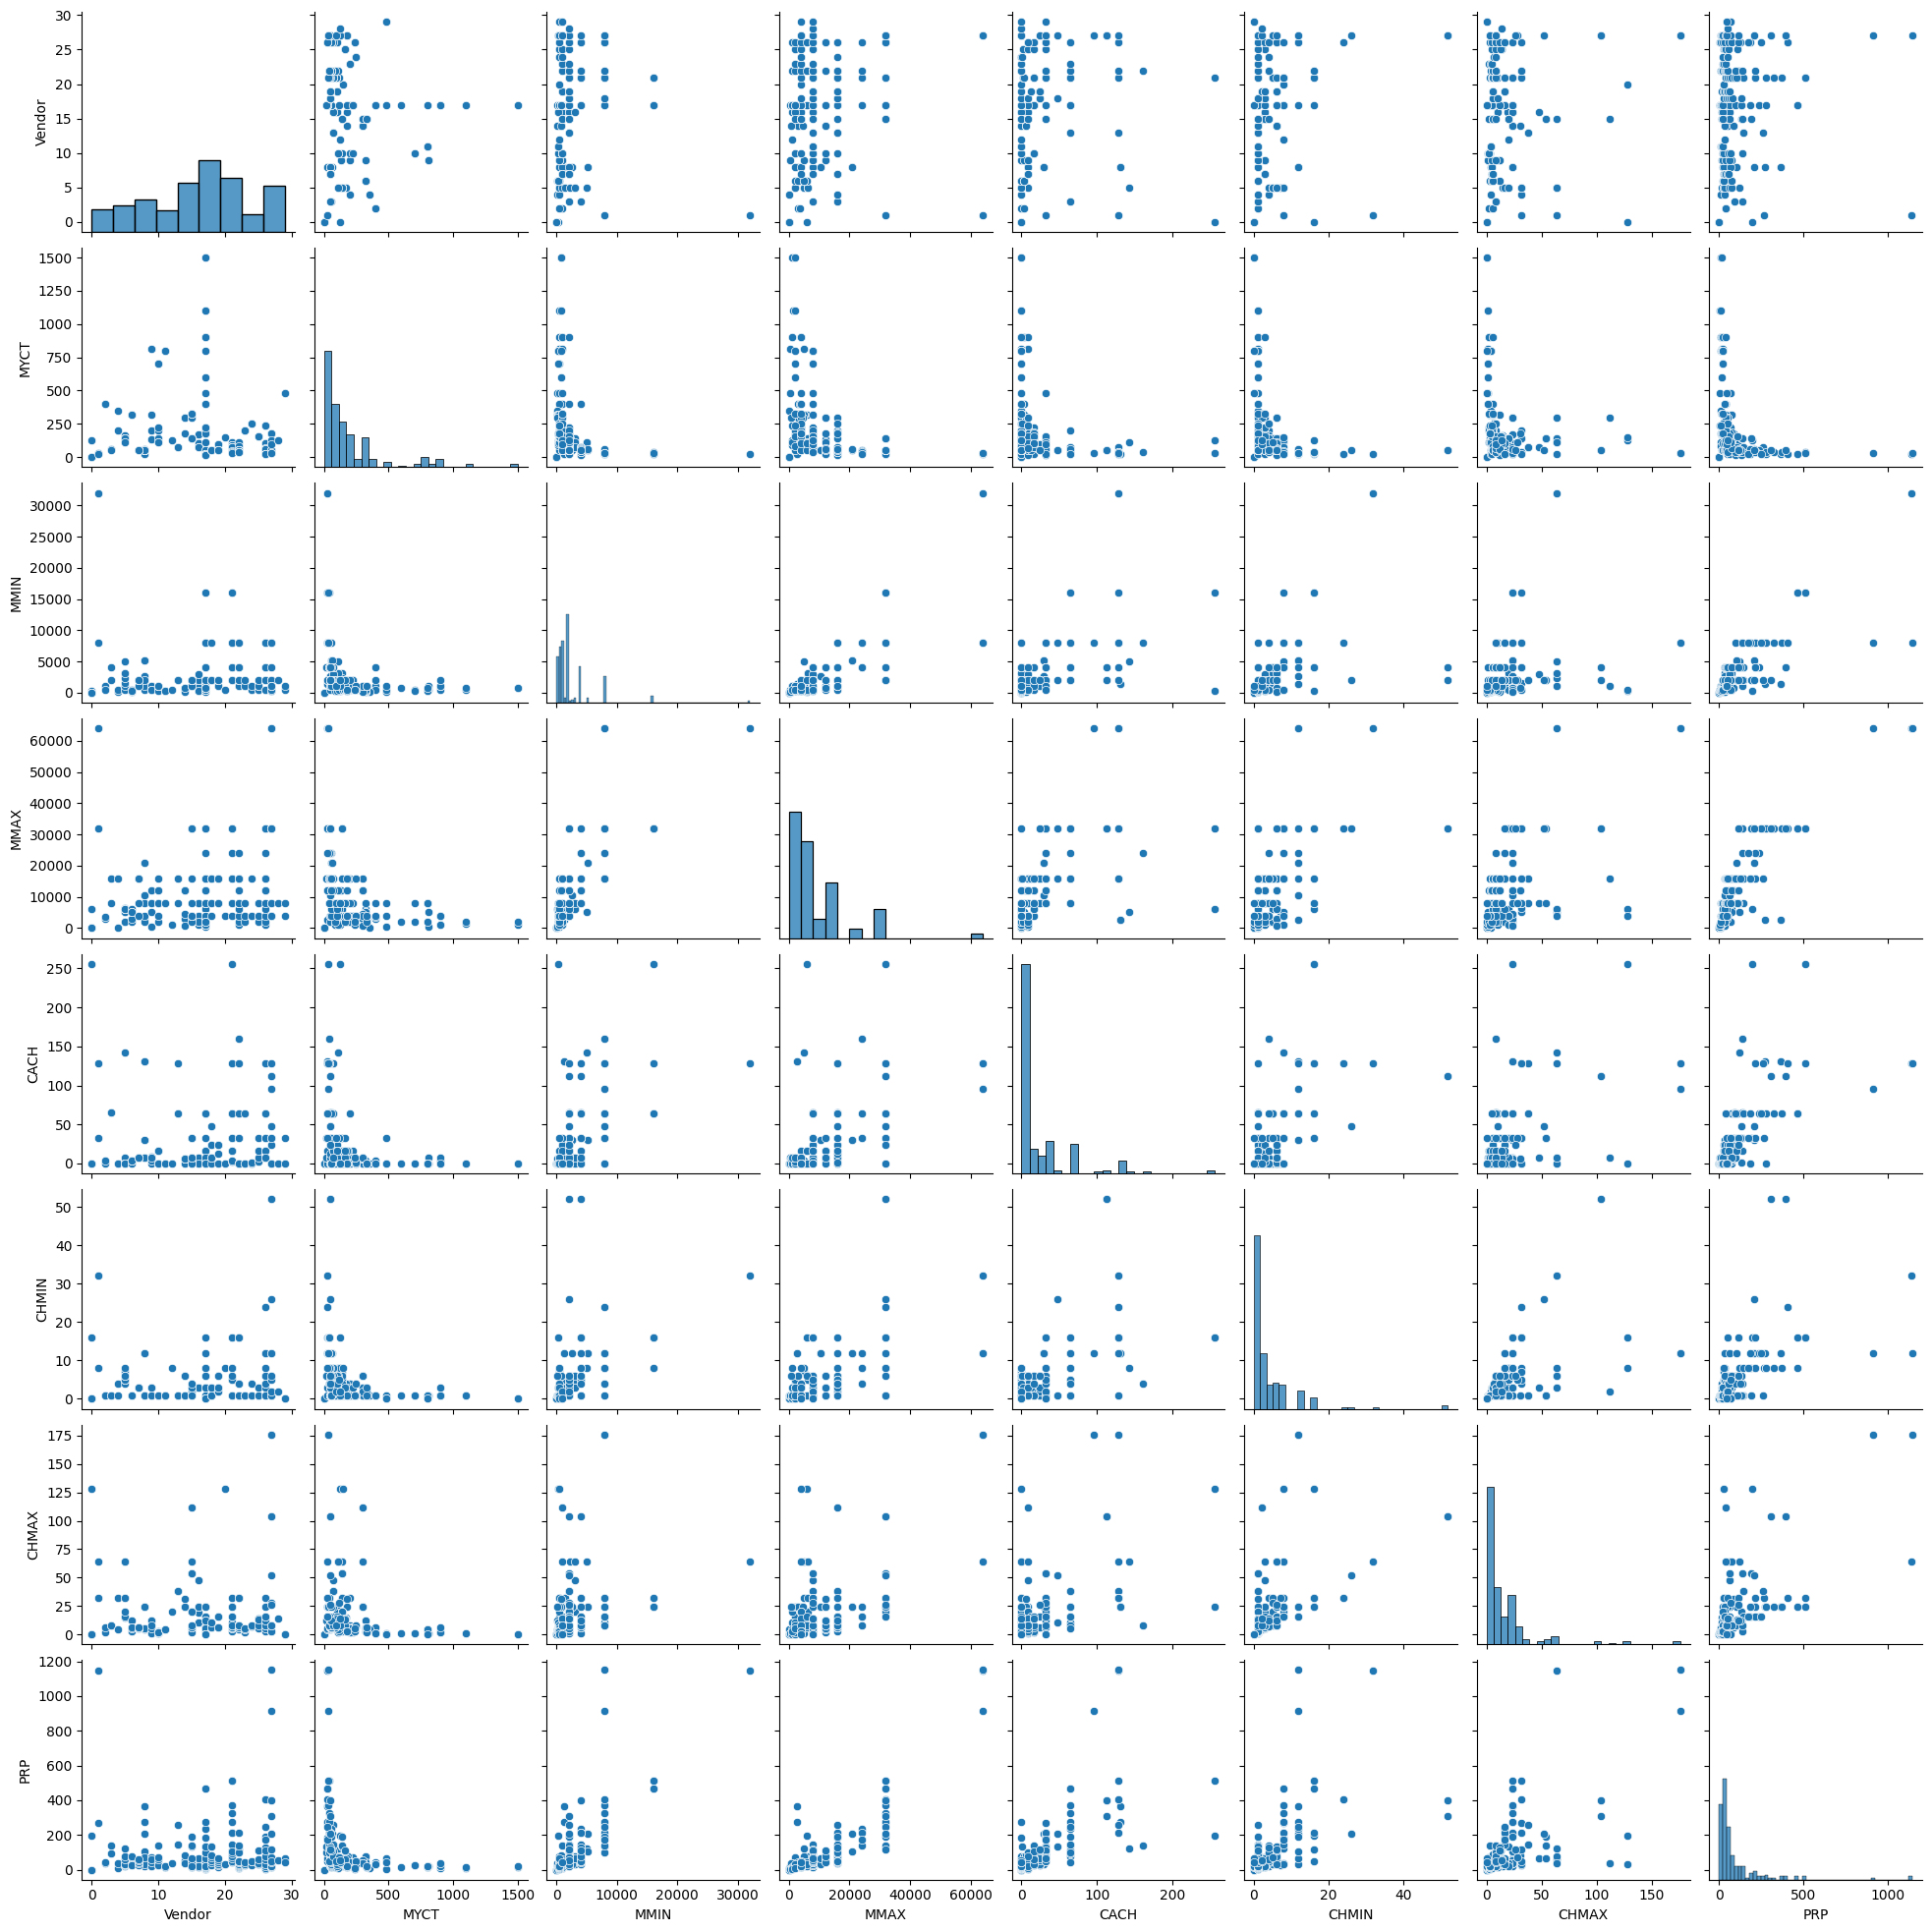

In [21]:
sns.pairplot(data)

<Axes: >

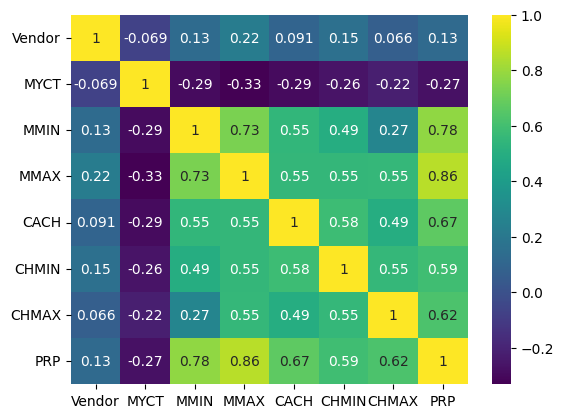

In [22]:
sns.heatmap(data.corr(),annot=True,cmap='viridis')

# <b><u>Question-3. Model Building [5M]
</u></b>

<b>1. Split the dataset into training and test sets. Answer without justification will not
be awarded marks. [1M]
</br>
>Case 1 : Train = 80 % Test = 20% </br>[ x_train1,y_train1] = 80% ;
[ x_test1,y_test1] = 20% ;
</br>
>Case 2 : Train = 10 % Test = 90% </br>[ x_train2,y_train2] = 10% ;
[ x_test2,y_test2] = 90% </b>




```
Importing required libraries
```



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from math import sqrt
from sklearn import metrics

> Case 1 : Train = 80 % Test = 20% </br>[ x_train1,y_train1] = 80% ;
[ x_test1,y_test1] = 20% ;
</br>

In [24]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,:-1].values
# Assigning features and known target outputs from training dataset

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.2)
print (X_train1.shape, y_train1.shape)
print (X_test1.shape, y_test1.shape)

#0.2 denotes 20% training dataset and 80% testing dataset

(167, 7) (167, 7)
(42, 7) (42, 7)


>Case 2 : Train = 10 % Test = 90% </br>[ x_train2,y_train2] = 10% ;
[ x_test2,y_test2] = 90%

In [25]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,Y, test_size=0.9, random_state=0)
print (X_train2.shape, y_train2.shape)
print (X_test2.shape, y_test2.shape)

#0.2 denotes 10% testinng dataset and 90% training dataset

(20, 7) (20, 7)
(189, 7) (189, 7)


**2. Explore k-fold cross-validation. [1M]**
Performing this by 3 random training & test data samples.
>Distribution of Data:


1.   Fold 1: </br>20%: Testing
</br>70%: Training

2.   Fold 1: </br>30%: Testing
</br>70%: Training

3. Fold 3: </br>40%: Testing
</br>70%: Training






In [26]:
# FOLD 1
x_randTrain1, x_randTest1, y_randTrain1, y_randTest1 = train_test_split(X, Y, test_size = 0.2)

model1 = LinearRegression()
model1.fit(x_randTrain1, y_randTrain1)
y_model1_random_predicted = model1.predict(x_randTest1)
mean_absolute_error_model1 = mean_absolute_error(y_randTest1, y_model1_random_predicted)

print("Error in Model1 cross-validation:", mean_absolute_error_model1)

Error in Model1 cross-validation: 2.4487505897571683e-12


In [27]:
# FOLD 2
x_randTrain2, x_randTest2, y_randTrain2, y_randTest2 = train_test_split(X, Y, test_size = 0.3)

model2 = LinearRegression()
model2.fit(x_randTrain2, y_randTrain2)
y_model2_random_predicted = model2.predict(x_randTest2)
mean_absolute_error_model2 = mean_absolute_error(y_randTest2, y_model2_random_predicted)

print("Error in Model2 cross-validation:", mean_absolute_error_model2)

Error in Model2 cross-validation: 1.26018393949441e-12


In [28]:
# FOLD 3
x_randTrain3, x_randTest3, y_randTrain3, y_randTest3 = train_test_split(X, Y, test_size = 0.4)
model3 = LinearRegression()
model3.fit(x_randTrain3, y_randTrain3)
y_model3_random_predicted  = model3.predict(x_randTest3)
mean_absolute_error_fold_3 = mean_absolute_error(y_randTest3, y_model3_random_predicted)

print("Error in Model3 cross-validation:", mean_absolute_error_fold_3)

Error in Model3 cross-validation: 9.713178688553847e-13


In [29]:
TestingErrorRate = (mean_absolute_error_model1 + mean_absolute_error_model2 + mean_absolute_error_fold_3)/3
print("Total test error rate of three-Model cross-validation:", TestingErrorRate)

Total test error rate of three-Model cross-validation: 1.560084132702321e-12


**3. Build Model/s using 1) Linear Regression (sklearn or other libraries can be used)
[3M] “ Target variable: PRP OR ERP"**


In [30]:
# model-building cell 70: Train 80% and Test 20%
mod1 = LinearRegression()
mod1.fit(X_train1, y_train1)
print('Model-1 intercept (theta_0) = ', mod1.intercept_)
print('Model-1 coefficient (theta_1) = ', mod1.coef_)

Model-1 intercept (theta_0) =  [ 5.15143483e-14  1.73372428e-12  1.81898940e-12  9.09494702e-12
 -1.00186526e-12 -6.88338275e-14 -4.01456646e-13]
Model-1 coefficient (theta_1) =  [[ 1.00000000e+00 -9.84276416e-17  1.83348810e-18 -2.00749254e-18
  -3.12131449e-17 -8.76925696e-17  8.95476173e-17]
 [-1.28153909e-13  1.00000000e+00 -4.71844785e-16  1.11022302e-16
  -1.06468653e-16  5.65790904e-16  4.44251840e-17]
 [-1.27771102e-14 -8.04911693e-16  1.00000000e+00 -1.94289029e-16
  -4.29073010e-17  7.27757156e-16 -4.55520767e-16]
 [-1.01398852e-14 -1.14352972e-14  8.32667268e-17  1.00000000e+00
  -3.58437238e-16 -1.52991769e-14  4.43414294e-15]
 [-1.17826427e-15  3.45101552e-15  6.90365733e-17  2.00577402e-17
   1.00000000e+00  2.99835899e-16 -2.91740435e-16]
 [-7.79848245e-17  2.33591358e-16  5.21772296e-18  6.50521303e-19
  -4.07254500e-17  1.00000000e+00  1.70254761e-16]
 [ 6.65245213e-17  1.36747710e-15  2.09589832e-17  7.69783542e-18
  -6.64865542e-17  8.05897348e-16  1.00000000e+00]]


In [31]:
# model-building cell 71: Train 10% and Test 90%
mod2 = LinearRegression()
mod2.fit(X_train2, y_train2)
print('Model-1 intercept (theta_0) = ', mod2.intercept_)
print('Model-1 coefficient (theta_1) = ', mod2.coef_)

Model-1 intercept (theta_0) =  [ 3.55271368e-15  0.00000000e+00  9.54969437e-12  0.00000000e+00
 -4.97379915e-14 -1.24344979e-14  1.31450406e-13]
Model-1 coefficient (theta_1) =  [[ 1.00000000e+00  8.67517035e-18  1.83430647e-19 -2.36800690e-19
   2.68080349e-16  5.50714953e-17  4.05248347e-17]
 [ 3.25620576e-14  1.00000000e+00 -3.33066907e-16  1.11022302e-16
  -2.15296531e-14 -3.29250516e-15  4.24660307e-15]
 [-2.09230905e-13 -6.77236045e-15  1.00000000e+00 -3.88578059e-16
   9.70300229e-14  3.55269199e-14  2.54934962e-14]
 [-2.51096898e-13  6.77236045e-15 -8.88178420e-16  1.00000000e+00
   1.24856722e-14  6.44129932e-14 -4.87023616e-15]
 [ 8.31663784e-16  1.34441069e-16  1.99493200e-17 -6.50521303e-18
   1.00000000e+00  3.93540825e-16  9.81169085e-17]
 [ 1.58426539e-16  1.51788304e-18  0.00000000e+00  6.50521303e-19
  -1.16285765e-16  1.00000000e+00  1.26870289e-16]
 [-5.43471634e-16 -1.91686944e-16 -5.46437895e-17  7.37257477e-18
   3.49146981e-16 -5.07030534e-16  1.00000000e+00]]


# <b><u>Question-4. Performance Evaluation [2 M]
</u></b>

<b>1. Do the prediction for the test data and display the results for the inference.
Calculate all the evaluation metrics and choose best for your model. Justify your
answer. Answers without justification will not be awarded marks. [1M] </b>



```
MODEL 1
```



In [32]:
#PRediction results for Model1 test Data
y_predicted_1 = mod1.predict(X_test1)
print(y_predicted_1)


[[ 1.51577619e-05  3.48628525e-04  2.42524190e-01  9.70096760e-01
   9.70096759e-04  2.42524190e-04  4.85048380e-04]
 [ 1.70000000e+01  1.70000000e+01  4.00000000e+03  1.60000000e+04
   3.20000000e+01  6.00000000e+00  1.20000000e+01]
 [ 1.70000000e+01  8.00000000e+02  7.68000000e+02  2.00000000e+03
   1.83205223e-12  1.22021771e-13  7.25148117e-13]
 [ 1.00000000e+01  7.00000000e+02  3.84000000e+02  8.00000000e+03
   1.58904302e-12  1.00000000e+00  1.00000000e+00]
 [ 2.30000000e+01  2.00000000e+02  1.00000000e+03  4.00000000e+03
  -1.90361824e-13  1.00000000e+00  4.00000000e+00]
 [ 1.60000000e+01  7.50000000e+01  3.00000000e+03  8.00000000e+03
   8.00000000e+00  3.00000000e+00  4.80000000e+01]
 [ 6.00000000e+00  3.20000000e+02  1.28000000e+02  6.00000000e+03
   2.21372195e-13  1.00000000e+00  1.20000000e+01]
 [ 2.00000000e+00  4.00000000e+02  5.12000000e+02  3.50000000e+03
   4.00000000e+00  1.00000000e+00  6.00000000e+00]
 [ 2.70000000e+01  1.80000000e+02  2.62000000e+02  4.00000000e+0

In [33]:
mod1.coef_

array([[ 1.00000000e+00, -9.84276416e-17,  1.83348810e-18,
        -2.00749254e-18, -3.12131449e-17, -8.76925696e-17,
         8.95476173e-17],
       [-1.28153909e-13,  1.00000000e+00, -4.71844785e-16,
         1.11022302e-16, -1.06468653e-16,  5.65790904e-16,
         4.44251840e-17],
       [-1.27771102e-14, -8.04911693e-16,  1.00000000e+00,
        -1.94289029e-16, -4.29073010e-17,  7.27757156e-16,
        -4.55520767e-16],
       [-1.01398852e-14, -1.14352972e-14,  8.32667268e-17,
         1.00000000e+00, -3.58437238e-16, -1.52991769e-14,
         4.43414294e-15],
       [-1.17826427e-15,  3.45101552e-15,  6.90365733e-17,
         2.00577402e-17,  1.00000000e+00,  2.99835899e-16,
        -2.91740435e-16],
       [-7.79848245e-17,  2.33591358e-16,  5.21772296e-18,
         6.50521303e-19, -4.07254500e-17,  1.00000000e+00,
         1.70254761e-16],
       [ 6.65245213e-17,  1.36747710e-15,  2.09589832e-17,
         7.69783542e-18, -6.64865542e-17,  8.05897348e-16,
         1.0000000

<ipython-input-34-8cca0d15d3f4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_predicted_1),bins=50)


<Axes: ylabel='Density'>

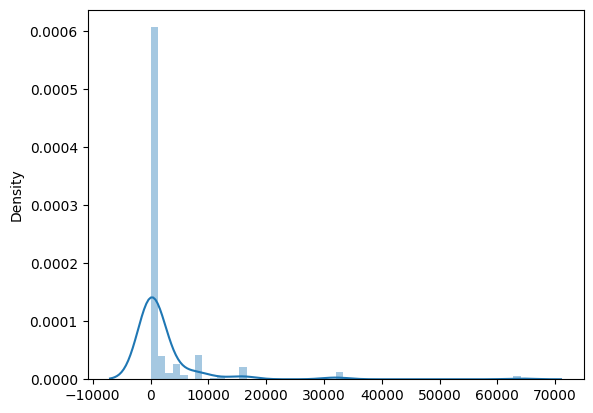

In [34]:
sns.distplot((y_predicted_1),bins=50)

In [35]:
#Evaluation Metrics

print('Model-1: Mean Absolute Error =', mean_absolute_error(y_test1,y_predicted_1))
print('Model-1: Mean Square error =', mean_squared_error(y_test1,y_predicted_1))
print('Model-1: Root Mean Squared error =', np.sqrt(mean_absolute_error(y_test1,y_predicted_1)))

Model-1: Mean Absolute Error = 1.287410295905437e-12
Model-1: Mean Square error = 1.44229532098797e-23
Model-1: Root Mean Squared error = 1.1346410427555656e-06




```
MODEL 2
```



In [36]:
#PRediction results for Model2 test Data
y_predicted_2 = mod2.predict(X_test2)
print(y_predicted_2)


[[3.00000000e+00 6.00000000e+01 2.00000000e+03 ... 6.50000000e+01
  1.00000000e+00 8.00000000e+00]
 [1.50000000e+01 3.30000000e+02 1.00000000e+03 ... 8.71574831e-15
  2.00000000e+00 4.00000000e+00]
 [8.00000000e+00 5.00000000e+01 2.62000000e+03 ... 3.00000000e+01
  1.20000000e+01 2.40000000e+01]
 ...
 [6.00000000e+00 3.20000000e+02 5.12000000e+02 ... 4.00000000e+00
  1.00000000e+00 3.00000000e+00]
 [2.20000000e+01 3.80000000e+01 4.00000000e+03 ... 3.20000000e+01
  1.60000000e+01 3.20000000e+01]
 [1.50000000e+01 3.00000000e+02 1.00000000e+03 ... 8.00000000e+00
  3.00000000e+00 6.40000000e+01]]


In [37]:
mod2.coef_

array([[ 1.00000000e+00,  8.67517035e-18,  1.83430647e-19,
        -2.36800690e-19,  2.68080349e-16,  5.50714953e-17,
         4.05248347e-17],
       [ 3.25620576e-14,  1.00000000e+00, -3.33066907e-16,
         1.11022302e-16, -2.15296531e-14, -3.29250516e-15,
         4.24660307e-15],
       [-2.09230905e-13, -6.77236045e-15,  1.00000000e+00,
        -3.88578059e-16,  9.70300229e-14,  3.55269199e-14,
         2.54934962e-14],
       [-2.51096898e-13,  6.77236045e-15, -8.88178420e-16,
         1.00000000e+00,  1.24856722e-14,  6.44129932e-14,
        -4.87023616e-15],
       [ 8.31663784e-16,  1.34441069e-16,  1.99493200e-17,
        -6.50521303e-18,  1.00000000e+00,  3.93540825e-16,
         9.81169085e-17],
       [ 1.58426539e-16,  1.51788304e-18,  0.00000000e+00,
         6.50521303e-19, -1.16285765e-16,  1.00000000e+00,
         1.26870289e-16],
       [-5.43471634e-16, -1.91686944e-16, -5.46437895e-17,
         7.37257477e-18,  3.49146981e-16, -5.07030534e-16,
         1.0000000

<ipython-input-38-273d356d4851>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_predicted_2),bins=50)


<Axes: ylabel='Density'>

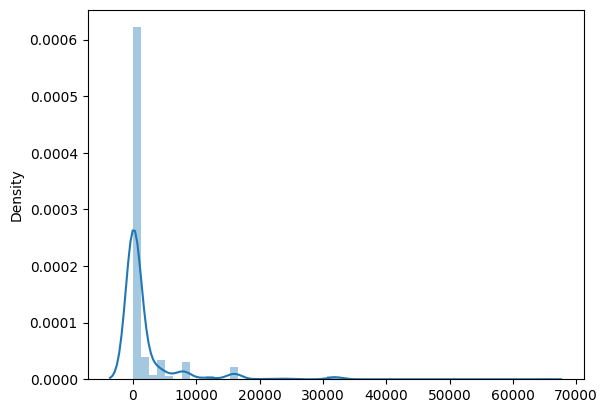

In [38]:
sns.distplot((y_predicted_2),bins=50)

In [39]:
#Evaluation Metrics

print('Model-2: Mean Absolute Error =', mean_absolute_error(y_test2,y_predicted_2))
print('Model-2: Mean Square error =', mean_squared_error(y_test2,y_predicted_2))
print('Model-2: Root Mean Squared error =', np.sqrt(mean_absolute_error(y_test2,y_predicted_2)))

Model-2: Mean Absolute Error = 1.1050262398663945e-12
Model-2: Mean Square error = 6.703021916701509e-24
Model-2: Root Mean Squared error = 1.0512022830389946e-06


As the dataset is numerical, regreseeion is better suited.

<b>2. List out the performance measures in a tabular format. (Accuracy, F1-score,
Efficiency, sensitivity or specificity)[1M] </b>



```
As this is Regression model:
Mean Absilute Error, Mean square Error and Root Mean squared error is better performance measures (Computed above) than Accuracy, F1 score, Efficency, sensitivity or Specificity
```

